In [58]:
#for Data
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import sys 
sys.path.append("../Function/")
from function import remove_high_corr
from function import remove_outliers
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#for NN
import keras
from keras import models
from keras import layers
from keras.layers import Dropout


upload data

In [2]:
df = pd.read_excel("../../site_info_ver_3.3.xlsx")
df.head(1)

,Date,Site_Name,Israelis_Count,Tourists_Count,Total,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_christiansHeritage,is_nationalPark,is_natureReserve,is_archaeology,is_religion,is_animals,is_heritage,is_water,is_cave,is_lookout,pm10,pm2.5,nox,so2,Temperature,is_HeatWave,Tel_Aviv-Yafo_pm10,Jerusalem_pm10,Haifa_pm10,Ashkelon_pm10,Beer-Sheva_pm10,Tel_Aviv-Yafo_pm2.5,Jerusalem_pm2.5,Haifa_pm2.5,Ashkelon_pm2.5,Beer-Sheva_pm2.5,Tel_Aviv-Yafo_nox,Jerusalem_nox,Haifa_nox,Ashkelon_nox,Beer-Sheva_nox,Tel_Aviv-Yafo_so2,Jerusalem_so2,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,is_Site_exceeded_pm10,is_Site_exceeded_pm2.5,is_Site_exceeded_nox,is_Site_exceeded_so2,Tel_Aviv-Yafo_pm10_exceeded,Jerusalem_pm10_exceeded,Haifa_pm10_exceeded,Ashkelon_pm10_exceeded,Beer-Sheva_pm10_exceeded,Tel_Aviv-Yafo_pm2.5_exceeded,Jerusalem_pm2.5_exceeded,Haifa_pm2.5_exceeded,Ashkelon_pm2.5_exceeded,Beer-Sheva_pm2.5_exceeded,Tel_Aviv-Yafo_so2_exceeded,Jerusalem_so2_exceeded,Haifa_so2_exceeded,Ashkelon_so2_exceeded,Beer-Sheva_so2_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Ashkelon_nox_exceeded,Beer-Sheva_nox_exceeded,Green_border,Season_autumn,Season_spring,Season_summer,Season_winter
0,2016-01-01,Alexander Stream-Bet Yannai,7,0,7,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,8.0,NaN,6.2,0.6,15.5,0,64.1,25.6,23.3,11.2,4.9,13.9,30.1,26.2,4.8,2.5,69.1,501.7,90.2,3.8,9.7,7.2,0.1,2.6,1.2,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1


In [6]:
df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_week'] = df['Date'].dt.week
df['Date_day'] = df['Date'].dt.day

C:\Users\asars\AppData\Local\Temp/ipykernel_18252/2118879396.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Date_week'] = df['Date'].dt.week


model regular drop na

In [7]:
df_drop_na = df.dropna()
df_drop_na = df_drop_na.sort_values(["Date","Site_Name"])
df_drop_na.reset_index(drop=True,inplace=True)
df_drop_na.head(1)

,Date,Site_Name,Israelis_Count,Tourists_Count,Total,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_christiansHeritage,is_nationalPark,is_natureReserve,is_archaeology,is_religion,is_animals,is_heritage,is_water,is_cave,is_lookout,pm10,pm2.5,nox,so2,Temperature,is_HeatWave,Tel_Aviv-Yafo_pm10,Jerusalem_pm10,Haifa_pm10,Ashkelon_pm10,Beer-Sheva_pm10,Tel_Aviv-Yafo_pm2.5,Jerusalem_pm2.5,Haifa_pm2.5,Ashkelon_pm2.5,Beer-Sheva_pm2.5,Tel_Aviv-Yafo_nox,Jerusalem_nox,Haifa_nox,Ashkelon_nox,Beer-Sheva_nox,Tel_Aviv-Yafo_so2,Jerusalem_so2,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,is_Site_exceeded_pm10,is_Site_exceeded_pm2.5,is_Site_exceeded_nox,is_Site_exceeded_so2,Tel_Aviv-Yafo_pm10_exceeded,Jerusalem_pm10_exceeded,Haifa_pm10_exceeded,Ashkelon_pm10_exceeded,Beer-Sheva_pm10_exceeded,Tel_Aviv-Yafo_pm2.5_exceeded,Jerusalem_pm2.5_exceeded,Haifa_pm2.5_exceeded,Ashkelon_pm2.5_exceeded,Beer-Sheva_pm2.5_exceeded,Tel_Aviv-Yafo_so2_exceeded,Jerusalem_so2_exceeded,Haifa_so2_exceeded,Ashkelon_so2_exceeded,Beer-Sheva_so2_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Ashkelon_nox_exceeded,Beer-Sheva_nox_exceeded,Green_border,Season_autumn,Season_spring,Season_summer,Season_winter,Date_year,Date_month,Date_week,Date_day
0,2016-01-01,Arbel,8,52,60,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,1,1,1,0,0,0,0,0,1,21.7,11.0,6.2,0.3,14.3,0,64.1,25.6,23.3,11.2,4.9,13.9,30.1,26.2,4.8,2.5,69.1,501.7,90.2,3.8,9.7,7.2,0.1,2.6,1.2,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,2016,1,53,1


In [8]:
X = df_drop_na.drop(['Israelis_Count','Tourists_Count','Total'],axis=1)
targets = df_drop_na[['Israelis_Count','Tourists_Count','Total']]

X = pd.get_dummies(X,'Site_Name',drop_first=True)
targets

#scale X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X =X.drop("Date",axis=1)
scaled_X = pd.DataFrame(scaler.fit_transform(scaled_X), columns=scaled_X.columns)


#scale y
scaled_targets = np.log(targets+0.01)
scaled_targets

scaled_df = scaled_X.merge(scaled_targets,left_index=True,right_index=True)

In [9]:
scaled_X.drop(remove_high_corr(scaled_df.drop(['Tourists_Count','Total','Date_year','Date_month','Date_week','Date_day'],axis=1),'Israelis_Count',0.4),axis=1,inplace=True)

C:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  exec(code_obj, self.user_global_ns, self.user_ns)


split the data

In [10]:
y=targets.Israelis_Count
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(scaled_X, y, test_size=0.2,shuffle=False,random_state=False)
train_df_scaled = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)

X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5,shuffle=False,random_state=False)
val_df_scaled = pd.merge(left=X_val, right=y_val, left_index=True, right_index=True)
test_df_scaled = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
X_train

,region_Central,region_South,is_weekend,operations,is_jewish_holiday,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,is_natureReserve,is_archaeology,is_water,is_cave,nox,so2,Temperature,Haifa_pm2.5,Tel_Aviv-Yafo_nox,Jerusalem_nox,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,is_Site_exceeded_nox,is_Site_exceeded_so2,Tel_Aviv-Yafo_pm10_exceeded,Ashkelon_pm10_exceeded,Beer-Sheva_pm10_exceeded,Haifa_pm2.5_exceeded,Ashkelon_pm2.5_exceeded,Tel_Aviv-Yafo_so2_exceeded,Jerusalem_so2_exceeded,Ashkelon_so2_exceeded,Beer-Sheva_so2_exceeded,Tel_Aviv-Yafo_nox_exceeded,Jerusalem_nox_exceeded,Haifa_nox_exceeded,Ashkelon_nox_exceeded,Season_autumn,Season_spring,Season_winter,Date_year,Date_month,Date_week,Date_day,Site_Name_Alexander Stream-Bet Yannai,Site_Name_Amud Stream,Site_Name_Ashkelon National Park,Site_Name_Avdat,Site_Name_Ayun Stream,Site_Name_Baptismal Site Qasr al-Yahud,Site_Name_Baram,Site_Name_Bet Alpha,Site_Name_Bet Shean,Site_Name_Bet Shearim,Site_Name_Caesarea,Site_Name_Dor HaBonim Beach,Site_Name_Eilat Coral Beach,Site_Name_En Afek,Site_Name_En Avdat,Site_Name_En Gedi,Site_Name_Gamla,Site_Name_Gan HaShlosha,Site_Name_Good Samaritan Museum,Site_Name_HaBsor(Eshkol Park),Site_Name_Hai Ramon,Site_Name_Hamat Tiberias,Site_Name_Hay-Bar Yotvata,Site_Name_Hermon Stream (Banias),Site_Name_Herodium Park,Site_Name_Horshat Tal,Site_Name_Hula,Site_Name_Khan Be’erot,Site_Name_Kokhav HaYarden,Site_Name_Korazim,Site_Name_Kursi,Site_Name_Maayan Harod,Site_Name_Makhtesh Ramon,Site_Name_Mamshit,Site_Name_Meshushim Stream,Site_Name_Mount Gerizim,Site_Name_Nimrod Fortress,Site_Name_Palmahim Beach,Site_Name_Prat Stream-En Mabo‘a,Site_Name_Snir Stream,Site_Name_Taninim Stream,Site_Name_Tel Arad,Site_Name_Tel Beer Sheva,Site_Name_Tel Dan,Site_Name_Tel Hazor,Site_Name_Tel Megiddo,Site_Name_The Majrase – Betiha,Site_Name_The Masada,Site_Name_Tzipori,Site_Name_Yehiam,Site_Name_Yehudiya
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.002899,0.005660,0.278373,0.025172,0.007741,0.227834,0.025694,0.055838,0.044693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,1.0,0.0,0.0,0.002758,0.060377,0.197002,0.025172,0.007741,0.227834,0.025694,0.055838,0.044693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.000795,0.001887,0.274090,0.025172,0.007741,0.227834,0.025694,0.055838,0.044693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,1.0,1.0,1.0,0.0,0.002899,0.011321,0.372591,0.025172,0.007741,0.227834,0.025694,0.055838,0.044693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,1.0,0.0,1.0,0.0,0.001169,0.000000,0.186296,0.025172,0.007741,0.227834,0.025694,0.055838,0.044693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

creat model

In [31]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
    
model = models.Sequential()
model.compile(optimizer='rmsprop',loss='mse',metrics=[rmse])

model.add(layers.Dense(len(scaled_X.columns),input_shape=(len(scaled_X.columns),),activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(252,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(8,activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(1))

In [32]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))


Epoch 1/100
1163/1163 [==============================] - 3s 2ms/step - loss: 1791145.1250 - rmse: 312.8216 - val_loss: 1703024.3750 - val_rmse: 293.9658
Epoch 2/100
1163/1163 [==============================] - 2s 2ms/step - loss: 1745062.2500 - rmse: 270.9753 - val_loss: 1707553.7500 - val_rmse: 278.6992
Epoch 3/100
1163/1163 [==============================] - 2s 2ms/step - loss: 1732683.6250 - rmse: 261.0234 - val_loss: 1700719.7500 - val_rmse: 270.0387
Epoch 4/100
1163/1163 [==============================] - 3s 2ms/step - loss: 1721772.6250 - rmse: 255.2901 - val_loss: 1741047.3750 - val_rmse: 295.1647
Epoch 5/100
1163/1163 [==============================] - 3s 2ms/step - loss: 1717907.0000 - rmse: 252.6018 - val_loss: 1698565.7500 - val_rmse: 265.2811
Epoch 6/100
1163/1163 [==============================] - 3s 2ms/step - loss: 1711211.3750 - rmse: 248.5519 - val_loss: 1727282.3750 - val_rmse: 293.0220
Epoch 7/100
1163/1163 [==============================] - 2s 2ms/step - loss: 17079

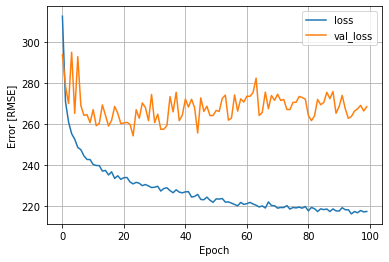

In [41]:
def plot_loss(history):
  plt.plot(history.history['rmse'], label='loss')
  plt.plot(history.history['val_rmse'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [RMSE]')
  plt.legend()
  plt.grid(True)

plot_loss(hist)


Model no pollution

In [48]:
cols_drops = [x for x in df.columns if 'pm10' in x or 'pm2.5' in x or 'nox' in x or 'so2' in x] 
cols_drops

df_no_pollution = df.drop(cols_drops,axis=1)
df_no_pollution.head()

,Date,Site_Name,Israelis_Count,Tourists_Count,Total,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,is_camping,special_activity,visit_duration,is_jewishHeritage,is_muslimsHeritage,is_christiansHeritage,is_nationalPark,is_natureReserve,is_archaeology,is_religion,is_animals,is_heritage,is_water,is_cave,is_lookout,Temperature,is_HeatWave,Green_border,Season_autumn,Season_spring,Season_summer,Season_winter,Date_year,Date_month,Date_week,Date_day
0,2016-01-01,Alexander Stream-Bet Yannai,7,0,7,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,15.5,0,0,0,0,0,1,2016,1,53,1
1,2016-01-02,Alexander Stream-Bet Yannai,28,0,28,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,13.8,0,0,0,0,0,1,2016,1,53,2
2,2016-01-03,Alexander Stream-Bet Yannai,7,0,7,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,16.6,0,0,0,0,0,1,2016,1,53,3
3,2016-01-04,Alexander Stream-Bet Yannai,31,0,31,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,17.5,0,0,0,0,0,1,2016,1,1,4
4,2016-01-05,Alexander Stream-Bet Yannai,33,0,33,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,18.9,0,0,0,0,0,1,2016,1,1,5


In [54]:
def set_X_y_scaling(df):
    X=df.drop(['Israelis_Count','Tourists_Count','Total'],axis=1)
    y =df.Israelis_Count
    X = pd.get_dummies(X,'Site_Name',drop_first=True)

    #scale X
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_X =X.drop("Date",axis=1)
    scaled_X = pd.DataFrame(scaler.fit_transform(scaled_X), columns=scaled_X.columns)


    #scale y
    scaled_y = np.log(y+0.01)

    return scaled_X,scaled_y

In [57]:
X_scaled , y_scaled = set_X_y_scaling(df_no_pollution)
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scaled, y_scaled, test_size=0.2,shuffle=False,random_state=False)
train_df_scaled = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)

X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5,shuffle=False,random_state=False)
val_df_scaled = pd.merge(left=X_val, right=y_val, left_index=True, right_index=True)
test_df_scaled = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)

In [78]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
    
model = models.Sequential()
model.compile(optimizer='rmsprop',loss='mse',metrics=[rmse])

model.add(layers.Dense(len(X_train.columns),input_shape=(len(X_train.columns),),activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(252,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(8,activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(1))
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
2728/2728 [==============================] - 7s 2ms/step - loss: 3.4687 - rmse: 1.4271 - val_loss: 3.0910 - val_rmse: 1.3696
Epoch 2/100
2728/2728 [==============================] - 6s 2ms/step - loss: 2.0710 - rmse: 1.0795 - val_loss: 3.4502 - val_rmse: 1.4523
Epoch 3/100
2728/2728 [==============================] - 7s 2ms/step - loss: 1.7246 - rmse: 0.9672 - val_loss: 3.5738 - val_rmse: 1.4824
Epoch 4/100
2728/2728 [==============================] - 7s 3ms/step - loss: 1.6312 - rmse: 0.9329 - val_loss: 3.9642 - val_rmse: 1.5598
Epoch 5/100
2728/2728 [==============================] - 7s 2ms/step - loss: 1.6091 - rmse: 0.9220 - val_loss: 4.2545 - val_rmse: 1.6147
Epoch 6/100
2728/2728 [==============================] - 6s 2ms/step - loss: 1.5976 - rmse: 0.9188 - val_loss: 4.3834 - val_rmse: 1.6393
Epoch 7/100
2728/2728 [==============================] - 6s 2ms/step - loss: 1.5946 - rmse: 0.9151 - val_loss: 4.4013 - val_rmse: 1.6459
Epoch 8/100
2728/2728 [==================

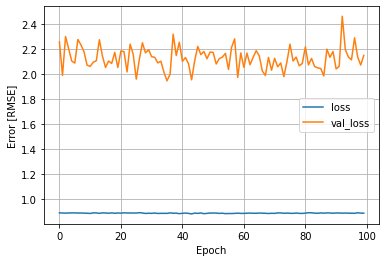

In [79]:
plot_loss(hist)

In [80]:
pre =model.predict(X_test) 
pd.DataFrame(data={
    'pre':[x[0] for x in pre],
    'test':[x for x in y_test]
})

,pre,test
0,2.889868,6.647701
1,2.907243,6.790108
2,2.925797,6.926587
3,3.680629,6.721438
4,3.710376,7.410353
...,...,...
10906,7.853326,1.611436
10907,7.258505,0.698135
10908,7.233047,2.303585
10909,7.776476,2.198335
